Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Head of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat 

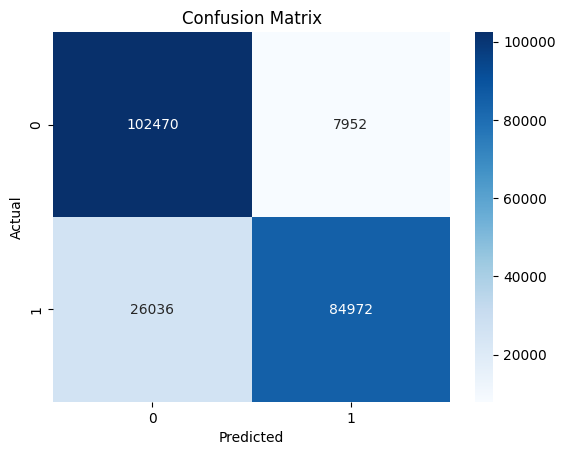

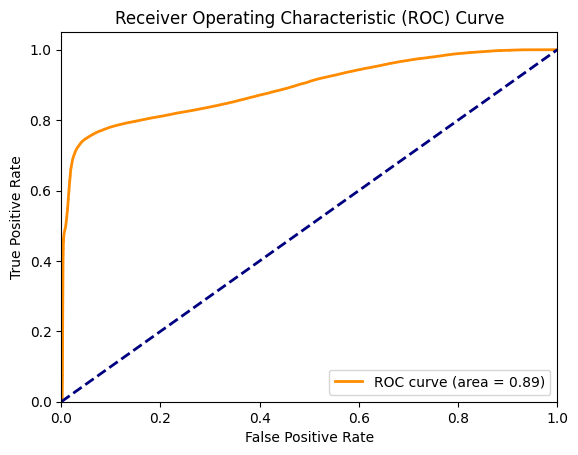

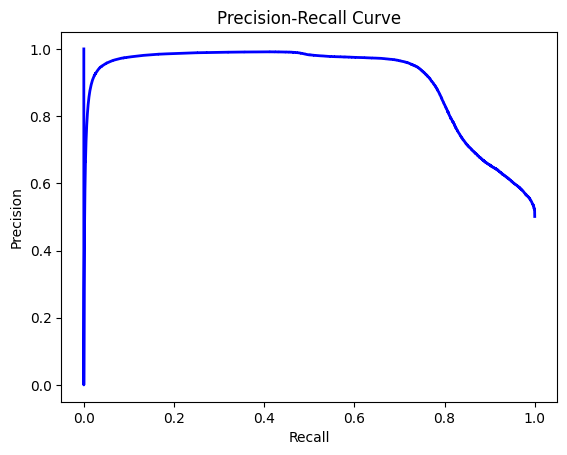

In [9]:
# Step 1: Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accsuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 2: Load the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Replace 'path_to_your_file.csv' with the path to your file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/Data/fraudTest.csv')

# Print the head of the dataframe to see the column names
print("Head of the dataset:")
print(df.head())
print('--------------------------------------')
print(df.isnull().sum())
print('--------------------------------------')
print(df.describe())
print('--------------------------------------')


# Step 3: Print the count of records for each label
print("Record count for each label:")
print(df['is_fraud'].value_counts())

# Step 4: Preprocess the dataset
# Separate the features and target variable
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Convert categorical variables to numeric
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Normalize numeric columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Step 5: Balance the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
print('--------------------------------------')
print("Record count after balancing:")
print(pd.Series(y_balanced).value_counts())

# Step 6: Train-test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Step 7: Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Step 8: Validate the model
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('--------------------------------------')
print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')
print('--------------------------------------')
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))
print('--------------------------------------')

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('')
print('')
print('')
# Plotting the ROC curve
y_test_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print('')
print('')
print('')

# Plotting the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

